# Project 2 - Ames Housing Data and Kaggle Challenge (Modelling Section)

## Problem Statement

This project aims to develop a suitable regression model to predict the value of a house in Ames city in the state of Iowa of the United States with the lowest possible error, based on the provided Ames Housing Dataset.
From the model, I aim to find out the three key predictors that can highly influence housing prices.

## Executive Summary

Housing prices can be affected by many factors. From this project where the data of Ames housing prices is provided, we have more than 70 over possible indicators that could possible influence the housing prices. As a result, this project aims to assist and inform buyers on selecting the right feature in a house to estimate the house pricing. In addition, it may also help home owners and property companies better price them.

## Data dictionary of the current best model generated

|Feature|Python data Type|Dataset|Description|Data type|
|---|---|---|---|---|
|**Lot Area**|*integer*|train/test|Lot size in square feet|Continuous|
|**Lot Config**|*integer*|train/test|Lot configuration|Nominal|
|**House Style**|*object*|train/test|Style of dwelling|Nominal| 
|**Mas Vnr Area**|*float*|train/test|Masonry veneer area in square feet|Continuous|
|**Bsmt Unf SF**|*float*|train/test|Unfinished square feet of basement area|Continuous| 
|**Total Bsmt SF**|*float*|train/test|Total square feet of basement area|Continuous|
|**Exter Score**|*int*|train/test|External condition scores(sum of external quality/condition columns converted as individual scores)|Continuous| 
|**Heating**|*object*|train/test|Type of heating|Nominal| 
|**Heating QC**|*object*|train/test|Heating quality and condition|Ordinal| 
|**Electrical**|*object*|train/test|Electrical system|Ordinal| 
|**Gr Liv Area**|*int*|train/test|Above grade (ground) living area square feet|Continuous| 
|**Kitchen AbvGr**|*int*|train/test|Kitchens above grade|Discrete| 
|**Kitchen Qual**|*object*|train/test|Kitchen quality|Ordinal| 
|**TotRms AbvGrd**|*int*|train/test|Total rooms above grade (does not include bathrooms)|Discrete| 
|**Fireplaces**|*int*|train/test|Number of fireplaces|Discrete| 
|**Fireplace Qu**|*object*|train/test|Fireplace quality|Ordinal|
|**Garage Finish**|*object*|train/test|Interior finish of the garage|Ordinal| 
|**Garage Cond**|*object*|train/test|Garage condition|Ordinal| 
|**Garage_Area_Per_Car**|*object*|train/test|Garage Area divided by Garage Cars allowed|Continuous|
|**Garage Type**|*object*|train/test|Garage location|Nominal|
|**Wood Deck SF**|*int*|train/test|Wood deck area in square feet|Continuous|
|**Total_Porch_Area**|*int*|train/test|Sum of open, enclosed,three season and screen porch areas in square feet|Continuous|
|**total_bath_rooms**|*int*|train/test|Sum of all half and full bathrooms|Continuous|
|**Season**|*int*|train/test|Seasons of the year the property is sold|Discrete|

## Additional notes
This notebook provides the modelling process based on processed training data and aims to identify the best possible model which achieve the best root mean squared error(RMSE) in terms of predicting a given test dataset.

Details on the conclusion and recommendations is provided in the previous notebook.

# Modelling

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

## Read in processed data

In [2]:
# Read in the provided training dataset by using interpreting NA values as per the list declared.
train_data = pd.read_csv("./datasets/train_data_eda.csv", index_col = "Id")
test_data = pd.read_csv("./datasets/test_data_eda.csv", index_col = "Id") 

In [3]:
train_data.columns.tolist()

['Unnamed: 0',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Cond',
 'Paved Drive',
 

 **View the first 5 rows of each data and drop unnamed:0 column**

In [4]:
train_data.drop("Unnamed: 0", axis=1, inplace = True)
train_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Exter Score,Bsmt score,Bsmt Finished Area,BsmtFin Score,Gr Liv Calc,total_bath_rooms,Garage years,Garage_Area_Per_Car,Total_Porch_Area,Season
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,73,13517,Pave,NaN,IR1,Lvl,AllPub,...,7,7,533.0,5,1479,3.0,34.0,237.5,44,Spring
544,531379050,60,RL,43,11492,Pave,NaN,IR1,Lvl,AllPub,...,7,8,637.0,5,2122,4.0,12.0,279.5,74,Spring
153,535304180,20,RL,68,7922,Pave,NaN,Reg,Lvl,AllPub,...,7,7,731.0,5,1057,2.0,57.0,246.0,52,Winter
318,916386060,60,RL,73,9802,Pave,NaN,Reg,Lvl,AllPub,...,6,8,0.0,0,1444,3.0,3.0,200.0,0,Spring
255,906425045,50,RL,82,14235,Pave,NaN,IR1,Lvl,AllPub,...,6,7,0.0,0,1445,2.0,53.0,242.0,59,Spring


In [5]:
test_data.drop("Unnamed: 0", axis=1, inplace = True)
test_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Exter Score,Bsmt score,Bsmt Finished Area,BsmtFin Score,Gr Liv Calc,total_bath_rooms,Garage years,Garage_Area_Per_Car,Total_Porch_Area,Season
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,AllPub,...,5,6,533.0,0,1928,2,96.0,440.0,172,Spring
2718,905108090,90,RL,75,9662,Pave,NaN,IR1,Lvl,AllPub,...,6,8,637.0,0,1967,2,29.0,290.0,0,Summer
2414,528218130,60,RL,58,17104,Pave,NaN,IR1,Lvl,AllPub,...,7,11,731.0,5,1496,4,0.0,213.0,24,Fall
1989,902207150,30,RM,60,8520,Pave,NaN,Reg,Lvl,AllPub,...,7,7,0.0,0,968,1,72.0,240.0,184,Summer
625,535105100,20,RL,75,9500,Pave,NaN,IR1,Lvl,AllPub,...,6,8,0.0,3,1394,3,46.0,257.0,261,Summer


## Define necessary function

In [6]:
def encode_and_bind(df, feature_to_encode):
    """
    This function takes in a dataframe and a specified feature/dataframe column and applies
    an categorical encoding to the specified feature. Subsequently, the encoded feature would be 
    concatenated with the original dataframe, with the original feature dropped.
    
    Takes in the following arguments:
    @df: Pandas dataframe
    @feature_to_encode: dataframe column name(feature) to be encoded
    """
    dummies = pd.get_dummies(df[[feature_to_encode]])
    columns = dummies.columns.tolist()
    res = pd.concat([df, dummies], axis=1)
    return res, columns 

def plot_cv(alphas, cv_means, optimal_alpha, lr_mse, log=False):
    """
    This function generates a plot of root mean square error against respective alpha values 
    that were used in either Lasso or Ridge modelling. In addition, the mse value for
    linear regression and optimal_alpha value is also plotted for reference.
    
    Takes in the following arguments:
    @alphas: List of alphas
    @cv_means: Average cv score for each value of alpha
    @optimal_alpha: Optimal alpha value for the model to be plotted in black
    @lr_mse: Linear regression mse value to be plotted in red
    @log: state to determine if x-axis needs to be in log scale
    """
    fig = plt.figure(figsize=(12,8))
    ax = plt.gca()

    if log:
        ax.semilogx(alphas, cv_means, lw=2)
    else:
        ax.plot(alphas, list(reversed(cv_means)), lw=2)
    ax.axvline(optimal_alpha, color = 'black')
    ax.axhline(lr_mse, color = 'red')
    ax.set_xlabel('alpha')
    ax.set_ylabel('Mean squared eror')

In [7]:
train_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Exter Score,Bsmt score,Bsmt Finished Area,BsmtFin Score,Gr Liv Calc,total_bath_rooms,Garage years,Garage_Area_Per_Car,Total_Porch_Area,Season
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,73,13517,Pave,NaN,IR1,Lvl,AllPub,...,7,7,533.0,5,1479,3.0,34.0,237.5,44,Spring
544,531379050,60,RL,43,11492,Pave,NaN,IR1,Lvl,AllPub,...,7,8,637.0,5,2122,4.0,12.0,279.5,74,Spring
153,535304180,20,RL,68,7922,Pave,NaN,Reg,Lvl,AllPub,...,7,7,731.0,5,1057,2.0,57.0,246.0,52,Winter
318,916386060,60,RL,73,9802,Pave,NaN,Reg,Lvl,AllPub,...,6,8,0.0,0,1444,3.0,3.0,200.0,0,Spring
255,906425045,50,RL,82,14235,Pave,NaN,IR1,Lvl,AllPub,...,6,7,0.0,0,1445,2.0,53.0,242.0,59,Spring


Plot a customise heatmap and identify possible useful columns for modelling by defining a threshold which any columns with absolute correlation value that is less than the threshold would be set to 0. Visually, this would help us identfiy potential columns.

- Mas Vnr Area, 
- Bsmt Qual,
- Bsmt Exposure,
- Total Bsmt SF,
- Gr Living Area,
- Kitchen Qual,
- TotRms AbvGrd,
- Fireplaces, 
- Fireplace Qu,
- Garage Finish,
- remod age,
- Exter Score, 
- Bsmt Finished Area,
- BsmtFin Score
- Total_bath_rooms,
- Wood deck area,
- Garage Type

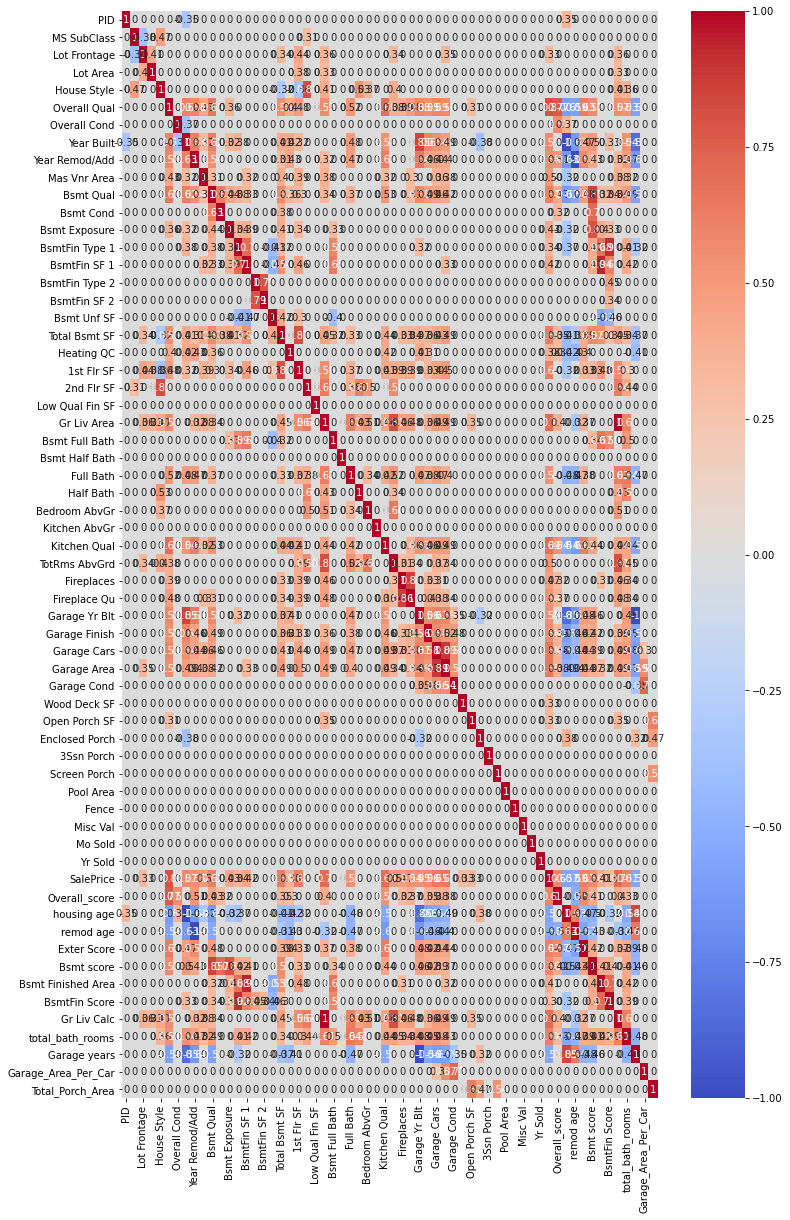

In [8]:
train_data_corr = train_data.corr()
train_data_corr[np.abs(train_data_corr)<.3] = 0
plt.figure(figsize=(12,20))
sns.heatmap(train_data_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

## Dropping related columns

**As mentioned in the section "*Checking the distribution of columns with specified number of unique values to identify the distribution of values*" of the previous notebook, I will drop columns which consist a specific value that takes up more than 90% of training data. For consistency purposes, the same columns dropped in training data would be dropped from test data as well for consistency in modelling process in next notebook.**

In [9]:
special_columns = ['Street', 'Alley', 'Utilities', 'Land Slope', 'Central Air', 'Paved Drive']

train_data.drop(special_columns, 
                axis = 1,
                inplace = True
               )

test_data.drop(special_columns,
               axis = 1,
               inplace = True
              )

**Drop the relevant columns that are processed in the previous notebook's *Feature engineering* sections**

In [10]:
# Drop PID columns as it does not make any sense to include it for modelling 
train_data.drop(["PID"], axis =1, inplace = True)
test_data.drop(["PID"], axis =1, inplace = True)

# Dwelling columns
train_data.drop(["MS SubClass","MS Zoning"], axis = 1, inplace = True)
test_data.drop(["MS SubClass", "MS Zoning"], axis = 1, inplace = True)

# Lot Columns
#train_data.drop(["Lot Area"], axis = 1 ,inplace = True)
#test_data.drop(["Lot Area"], axis = 1 ,inplace = True)
#train_data.drop(["Lot Config"], axis = 1 ,inplace = True)
#test_data.drop(["Lot Config"], axis = 1 ,inplace = True)

train_data.drop(["Lot Shape"], axis = 1 ,inplace = True)
test_data.drop(["Lot Shape"], axis = 1 ,inplace = True)

train_data.drop(["Lot Frontage"], axis = 1, inplace = True)
test_data.drop(["Lot Frontage"], axis = 1, inplace = True)

# Drop land contour as I hypothesis it would not be helpful in house price prediction
train_data.drop(['Land Contour'], axis =1, inplace = True) 
test_data.drop(['Land Contour'], axis =1, inplace = True)

# Drop to simplify modelling
train_data.drop(["Neighborhood"], axis = 1, inplace = True)
test_data.drop(["Neighborhood"], axis = 1, inplace = True)

# Drop the Condition 1 and Condition 2 columns as majority of the dataset has norm condition. 
# Other conditions takes up about 5% of the data would not have much effect on house price when modelled.
train_data.drop(['Condition 1','Condition 2'], axis =1, inplace = True)
test_data.drop(['Condition 1','Condition 2'], axis =1, inplace = True)

# Building and house style as a representative for type and style
train_data.drop(["Bldg Type"], axis =1, inplace = True)
test_data.drop(["Bldg Type"], axis =1, inplace = True)
#train_data.drop(["House Type"], axis =1, inplace = True)
#test_data.drop(["House Type"], axis =1, inplace = True)


#Overall Quality/condition
train_data.drop(["Overall Qual","Overall Cond"], axis = 1, inplace = True)
test_data.drop(["Overall Qual","Overall Cond"], axis = 1, inplace = True)

# Year related
train_data.drop(["Year Remod/Add", "Year Built"], axis = 1, inplace = True)
test_data.drop(["Year Remod/Add", "Year Built"], axis = 1, inplace = True)

# Roof columns
train_data.drop(['Roof Matl'], axis = 1, inplace = True)
test_data.drop(['Roof Matl'], axis = 1, inplace = True)

train_data.drop(['Roof Style'], axis = 1, inplace = True)
test_data.drop(['Roof Style'], axis = 1, inplace = True)

# Exterior columns
train_data.drop(['Exterior 1st','Exterior 2nd'], axis = 1, inplace = True)
test_data.drop(['Exterior 1st','Exterior 2nd'], axis = 1, inplace = True)

# Mansory Veneer 
train_data.drop(["Mas Vnr Type"], axis = 1, inplace = True)
test_data.drop(["Mas Vnr Type"], axis = 1, inplace = True)

# External Quality/Condition and Foundation columns
train_data.drop(["Foundation"], axis = 1, inplace = True)
test_data.drop(["Foundation"], axis = 1, inplace = True)


# Basement related columns
train_data.drop(["Bsmt Qual","Bsmt Cond","Bsmt Exposure"], axis = 1, inplace = True)
test_data.drop(["Bsmt Qual","Bsmt Cond","Bsmt Exposure"], axis = 1, inplace = True)
train_data.drop(["BsmtFin SF 1", "BsmtFin SF 2"], axis = 1, inplace = True)
test_data.drop(["BsmtFin SF 1", "BsmtFin SF 2"], axis = 1, inplace = True)

train_data.drop(["BsmtFin Type 1","BsmtFin Type 2"], axis = 1, inplace = True)
test_data.drop(["BsmtFin Type 1","BsmtFin Type 2"], axis = 1, inplace = True)

#train_data.drop(["Bsmt Unf SF","Total Bsmt SF"], axis = 1, inplace = True)
#test_data.drop(["Bsmt Unf SF","Total Bsmt SF"], axis = 1, inplace = True)

# Heating and Electical areas
train_data.drop(["Heating"], axis = 1, inplace = True)
test_data.drop(["Heating"], axis = 1, inplace = True)
#train_data.drop(["Heating QC"], axis = 1, inplace = True)
#test_data.drop(["Heating QC"], axis = 1, inplace = True)

# Abv Ground Areas
train_data.drop(["Gr Liv Calc","1st Flr SF","2nd Flr SF","Low Qual Fin SF"], axis = 1, inplace = True)
test_data.drop(["Gr Liv Calc","1st Flr SF","2nd Flr SF","Low Qual Fin SF"], axis = 1, inplace = True)

# Room related areas
train_data.drop(["Bedroom AbvGr"], axis = 1, inplace = True)
test_data.drop(["Bedroom AbvGr"], axis = 1, inplace = True)
train_data.drop(["Full Bath", "Half Bath", "Bsmt Half Bath","Bsmt Full Bath"], axis = 1, inplace = True)
test_data.drop(["Full Bath", "Half Bath", "Bsmt Half Bath","Bsmt Full Bath"], axis = 1, inplace = True)

# Kitchen
#train_data.drop(["Kitchen AbvGr"], axis = 1, inplace = True)
#test_data.drop(["Kitchen AbvGr"], axis = 1, inplace = True)
#train_data.drop(["Kitchen Qual"], axis = 1, inplace = True)
#test_data.drop(["Kitchen Qual"], axis = 1, inplace = True)

# Drop Functional columns 
train_data.drop(["Functional"], axis = 1, inplace = True)
test_data.drop(["Functional"], axis = 1, inplace = True)

# Fireplaces
#train_data.drop(["Fireplaces"], axis = 1, inplace = True)
#test_data.drop(["Fireplaces"], axis = 1, inplace = True)
train_data.drop(["Fireplace Qu"], axis = 1, inplace = True)
test_data.drop(["Fireplace Qu"], axis = 1, inplace = True)

# Garage related
train_data.drop(["Garage Yr Blt"], axis = 1, inplace = True)
test_data.drop(["Garage Yr Blt"], axis = 1, inplace = True)
train_data.drop(["Garage Area","Garage Cars"], axis = 1, inplace = True)
test_data.drop(["Garage Area","Garage Cars"], axis = 1, inplace = True)
#train_data.drop(["Garage Type","Garage Finish","Garage Cond"], axis = 1, inplace = True)
#test_data.drop(["Garage Type","Garage Finish","Garage Cond"], axis = 1, inplace = True)

# Porch and Deck
#train_data.drop(["Wood Deck SF"], axis =1, inplace = True)
#test_data.drop(["Wood Deck SF"], axis =1, inplace = True)
train_data.drop(["Open Porch SF","Enclosed Porch","3Ssn Porch","Screen Porch"], axis =1, inplace = True)
test_data.drop(["Open Porch SF","Enclosed Porch","3Ssn Porch","Screen Porch"], axis =1, inplace = True)

# Drop all these columns since most of the houses does not have a pool or miscellaneous feature
train_data.drop(["Pool Area"], axis = 1, inplace = True)
test_data.drop(["Pool Area"], axis = 1, inplace = True)

#Pool and Misc
train_data.drop(["Pool QC"], axis = 1, inplace = True)
test_data.drop(["Pool QC"], axis = 1, inplace = True)

train_data.drop(["Misc Feature"], axis = 1, inplace = True)
test_data.drop(["Misc Feature"], axis = 1, inplace = True)
train_data.drop(["Misc Val"], axis = 1, inplace = True)
test_data.drop(["Misc Val"], axis = 1, inplace = True)

# Drop fence column for simplicity
train_data.drop(["Fence"], axis = 1, inplace = True)
test_data.drop(["Fence"], axis = 1, inplace = True)

# Month, year sold and sale type
train_data.drop(["Mo Sold", "Yr Sold"], axis =1, inplace = True)
test_data.drop(["Mo Sold","Yr Sold"], axis =1, inplace = True)

train_data.drop(["Sale Type"], axis = 1, inplace = True)
test_data.drop(["Sale Type"], axis = 1, inplace = True)

**This code block was intended to facilitate the removal or inclusion or self created columns through feature engineering in the previous notebook.**

In [11]:
#self_created_column = ["Overall_score",
                       #"housing age",
                       #"remod age",
                       #"Exter Score",
                       #"Bsmt score",
                       #"Bsmt Finished Area",
                       #"BsmtFin Score",
                       #"total_bath_rooms",
                       #"Garage years",
                       #"Garage_Area_Per_Car",
                       #"Total_Porch_Area",
                       #"Season"
                      #]

#train_data.drop(self_created_column, axis = 1, inplace = True)
#test_data.drop(self_created_column, axis = 1, inplace = True)

In [12]:
# Check what are the remaining columns
train_data.columns

Index(['Lot Area', 'Lot Config', 'House Style', 'Mas Vnr Area', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Gr Liv Area', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Type',
       'Garage Finish', 'Garage Cond', 'Wood Deck SF', 'SalePrice',
       'Overall_score', 'housing age', 'remod age', 'Exter Score',
       'Bsmt score', 'Bsmt Finished Area', 'BsmtFin Score', 'total_bath_rooms',
       'Garage years', 'Garage_Area_Per_Car', 'Total_Porch_Area', 'Season'],
      dtype='object')

In [13]:
# Check what are the remaining columns
test_data.columns

Index(['Lot Area', 'Lot Config', 'House Style', 'Mas Vnr Area', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Gr Liv Area', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Type',
       'Garage Finish', 'Garage Cond', 'Wood Deck SF', 'Overall_score',
       'housing age', 'remod age', 'Exter Score', 'Bsmt score',
       'Bsmt Finished Area', 'BsmtFin Score', 'total_bath_rooms',
       'Garage years', 'Garage_Area_Per_Car', 'Total_Porch_Area', 'Season'],
      dtype='object')

**Extract a list of columns with object datatype to be used to for dummy encoding. Upon dummy encoding the variables, the original names used for encoding would be dropped**

In [14]:
column_to_encode = list(train_data.select_dtypes(['object']).columns)
column_to_encode

['Lot Config', 'Garage Type', 'Season']

In [15]:
list_train_dummy_col = []
list_test_dummy_col = []
for col in column_to_encode:
    train_data, train_data_dummy_col = encode_and_bind(train_data,col)
    test_data,test_data_dummy_col = encode_and_bind(test_data,col)
    list_train_dummy_col.append(train_data_dummy_col)
    list_test_dummy_col.append(test_data_dummy_col)
    
    
#Unpack lists of lists into single list
list_train_dummy_col  = [item for sublist in list_train_dummy_col for item in sublist]
list_test_dummy_col = [item for sublist in list_test_dummy_col for item in sublist]
print(list_train_dummy_col)
print(list_test_dummy_col)

#Check if the dummy columns created are the same for both test/train
list_train_dummy_col == list_test_dummy_col

['Lot Config_Corner', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Garage Type_2Types', 'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']
['Lot Config_Corner', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Garage Type_2Types', 'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']


True

In [16]:
train_data.drop(column_to_encode, axis = 1, inplace = True)
test_data.drop(column_to_encode, axis = 1, inplace = True)

## Applying models

In [17]:
predictors_columns = list(train_data.columns)
predictors_columns.remove("SalePrice")
predictors_columns

# This line was initially intended for removing any nominal predictors that were in training data and subsequently
# modelling only using numerical columns.
# required_predictors = [ele for ele in predictors_columns if ele not in column_to_encode]
required_predictors = predictors_columns
print(required_predictors)
print(len(required_predictors))



['Lot Area', 'House Style', 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Gr Liv Area', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Finish', 'Garage Cond', 'Wood Deck SF', 'Overall_score', 'housing age', 'remod age', 'Exter Score', 'Bsmt score', 'Bsmt Finished Area', 'BsmtFin Score', 'total_bath_rooms', 'Garage years', 'Garage_Area_Per_Car', 'Total_Porch_Area', 'Lot Config_Corner', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Garage Type_2Types', 'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']
40


**Define which columns to be used as predictor variables and the column for target variable and check the number of predictor columns used.**

In [18]:
X_train = train_data[required_predictors]
y_train = train_data["SalePrice"]
X_test = test_data[required_predictors]
print("Total predictors for training data: {}".format(X_train.shape[1]))
print("Total predictors for testing data: {}".format(X_train.shape[1]))

Total predictors for training data: 40
Total predictors for testing data: 40


In [19]:
test_data.columns

Index(['Lot Area', 'House Style', 'Mas Vnr Area', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Gr Liv Area', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Finish',
       'Garage Cond', 'Wood Deck SF', 'Overall_score', 'housing age',
       'remod age', 'Exter Score', 'Bsmt score', 'Bsmt Finished Area',
       'BsmtFin Score', 'total_bath_rooms', 'Garage years',
       'Garage_Area_Per_Car', 'Total_Porch_Area', 'Lot Config_Corner',
       'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3',
       'Lot Config_Inside', 'Garage Type_2Types', 'Garage Type_Attchd',
       'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort',
       'Garage Type_Detchd', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

**Define a list of predictors which are of nominal type and generate two separate lists of predictors columns:**
 - A list of predictors required to be applied with standard scaling.
 - Another list of predictors not required to be scaled.

In [20]:
# Define a list of original predictor columns which are nominal type
categorical_predictors = [
 "PID",
 "MS SubClass",
 "MS Zoning",
 "Street",
 "Alley",
 "Land Contour",
 "Lot Config",
 "Neighborhood",
 "Condition 1",
 "Condition 2",
 "Bldg Type",
 "House Style",
 "Roof Style",
 "Roof Matl",
 "Exterior 1st",
 "Exterior 2nd",
 "Mas Vnr Type",
 "Foundation",
 "Heating",
 "Central Air",
 "Garage Type",
 "Misc Feature",
 "Sale Type"
]

# Extend the list with dummy encoded columns
categorical_predictors.extend(list_train_dummy_col)
categorical_predictors

['PID',
 'MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Misc Feature',
 'Sale Type',
 'Lot Config_Corner',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'Lot Config_Inside',
 'Garage Type_2Types',
 'Garage Type_Attchd',
 'Garage Type_Basment',
 'Garage Type_BuiltIn',
 'Garage Type_CarPort',
 'Garage Type_Detchd',
 'Season_Fall',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter']

In [21]:
# Generate a list of predictors required to be scaled
predictors_to_scale = [elem for elem in required_predictors if elem not in categorical_predictors]
print(predictors_to_scale)
print("Predictors to be scaled: {}.".format(len(predictors_to_scale)))

print()

# Get the remaining predictors that are not required to be scaled
predictors_not_scale = [elem for elem in required_predictors if elem not in predictors_to_scale]
print(predictors_not_scale)
print("Predictors not to be scaled: {}.".format(len(predictors_not_scale)))

['Lot Area', 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Gr Liv Area', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Finish', 'Garage Cond', 'Wood Deck SF', 'Overall_score', 'housing age', 'remod age', 'Exter Score', 'Bsmt score', 'Bsmt Finished Area', 'BsmtFin Score', 'total_bath_rooms', 'Garage years', 'Garage_Area_Per_Car', 'Total_Porch_Area']
Predictors to be scaled: 24.

['House Style', 'Lot Config_Corner', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Garage Type_2Types', 'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']
Predictors not to be scaled: 16.


**Scale the necessary predictors and merge the output back with the predictors not required to be scaled**

In [22]:
ss = StandardScaler()

#For training data
X_train_scaled = ss.fit_transform(X_train[predictors_to_scale])
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = predictors_to_scale)
X_train_scaled_merged = pd.merge(X_train_scaled, X_train[predictors_not_scale], on = "Id")

#For test data
X_test_scaled = ss.transform(X_test[predictors_to_scale])
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = predictors_to_scale)
X_test_scaled_merged = pd.merge(X_test_scaled, X_test[predictors_not_scale], on = "Id")

In [23]:
# Check the merged dataframe after scaling
X_test_scaled_merged.head()

,Lot Area,Mas Vnr Area,Bsmt Unf SF,Total Bsmt SF,Heating QC,Gr Liv Area,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,...,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Season_Fall,Season_Spring,Season_Summer,Season_Winter
Id,,,,,,,,,,,,,,,,,,,,,
2658,-0.136957,-0.565901,1.017159,-0.083308,-1.512252,0.856782,4.563266,-2.280245,1.643827,-0.925701,...,0,0,0,0,0,1,0,1,0,0
2718,-0.059816,-0.565901,3.145658,2.022080,-0.343590,0.934731,4.563266,-0.777423,2.284917,-0.925701,...,0,1,0,0,0,0,0,0,1,0
2414,1.044200,-0.565901,-1.050655,-0.897006,0.825072,-0.006656,-0.204568,0.725399,0.361648,0.640811,...,0,1,0,0,0,0,1,0,0,0
1989,-0.229231,-0.565901,0.900282,-0.198916,-0.343590,-1.061968,-0.204568,-0.777423,-0.920531,-0.925701,...,0,0,0,0,0,1,0,0,1,0
625,-0.083848,0.851340,0.488967,0.748175,-1.512252,-0.210523,-0.204568,-0.777423,-0.279441,2.207324,...,0,1,0,0,0,0,0,0,1,0


### Linear Regression
Calculate the cross validation score and apply Linear Regression fit on our train set

In [24]:
y_train.head()

Id
109    130500
544    220000
153    109000
318    174000
255    138500
Name: SalePrice, dtype: int64

In [25]:
lr = LinearRegression()
lr_cv_mean_mse = -1 * cross_val_score(lr, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error").mean()

#Fit the model
lr.fit(X_train,y_train)
y_preds = lr.predict(X_train)

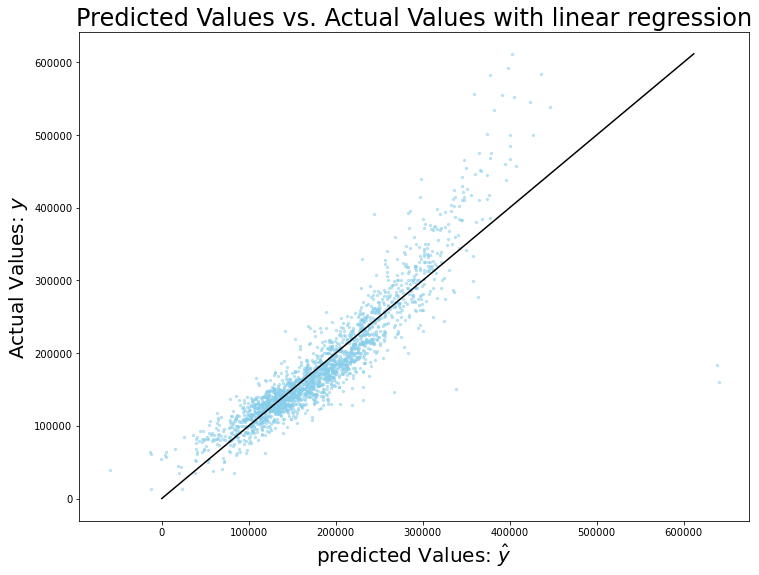

In [26]:
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y_train, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y_train)],
         [0, np.max(y_train)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values with linear regression', fontsize = 24);

### Lasso Regression
First, find the best alpha. Subsequently, we use the best alpha and do a cross validation on our model. Subsequently apply Lasso.fit to our dataset.

In [27]:
l_alphas = np.arange(0.05,3,0.05) # Make sure there is a sensible range for alphas
lasso_cv = LassoCV(alphas=l_alphas, cv =10)
lasso_cv.fit(X_train_scaled_merged, y_train)

/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59533977693.325195, tolerance: 1141672735.8068273
  model = cd_fast.enet_coordinate_descent_gram(
/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59432106514.44678, tolerance: 1141672735.8068273
  model = cd_fast.enet_coordinate_descent_gram(
/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7877034277.365234, tolerance: 1141672735.8068273
  model = cd_fast.enet_coordinate_descent_gram(
/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-

/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73501375855.51196, tolerance: 1287796691.8785386
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
       2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75,
       2.8 , 2.85, 2.9 , 2.95]),
        cv=10)

Plot the cross validated means against various alpha values and determine best alpha values

In [28]:
lasso_optimal_alpha = lasso_cv.alpha_
lasso_optimal_alpha

2.9

In [29]:
# Let's average the CV scores for each value of alpha
lasso_cv_means = [np.mean(cv_alpha) for cv_alpha in lasso_cv.mse_path_]

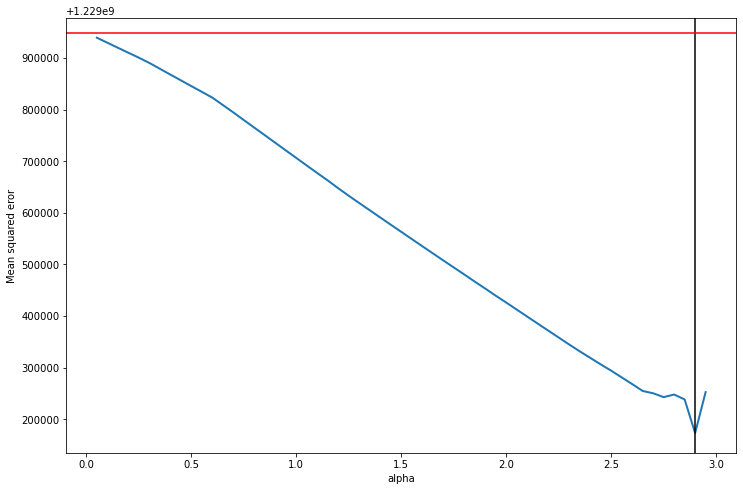

In [30]:
plot_cv(lasso_cv.alphas, lasso_cv_means, lasso_optimal_alpha, lr_cv_mean_mse, log=False)

Use Lasso regression for modelling using best alpha value

In [31]:
lasso_model_opt = Lasso(alpha = lasso_cv.alpha_, max_iter = 2000)
lasso_cv_score = -1 * cross_val_score(lasso_model_opt,
                              X_train_scaled_merged,
                              y_train,
                              cv=10,
                              scoring = "neg_mean_squared_error"
                             ).mean()

/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59433683481.49365, tolerance: 1141672735.8068273
  model = cd_fast.enet_coordinate_descent(
/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66913374496.01587, tolerance: 1173051739.8992095
  model = cd_fast.enet_coordinate_descent(
/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63591635832.65283, tolerance: 1174229208.6253495
  model = cd_fast.enet_coordinate_descent(
/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn

In [32]:
lasso_model_opt.fit(X_train_scaled_merged,y_train)

/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73398014131.70166, tolerance: 1287796691.8785386
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2.9, max_iter=2000)

In [33]:
y_preds = lasso_model_opt.predict(X_train_scaled_merged)

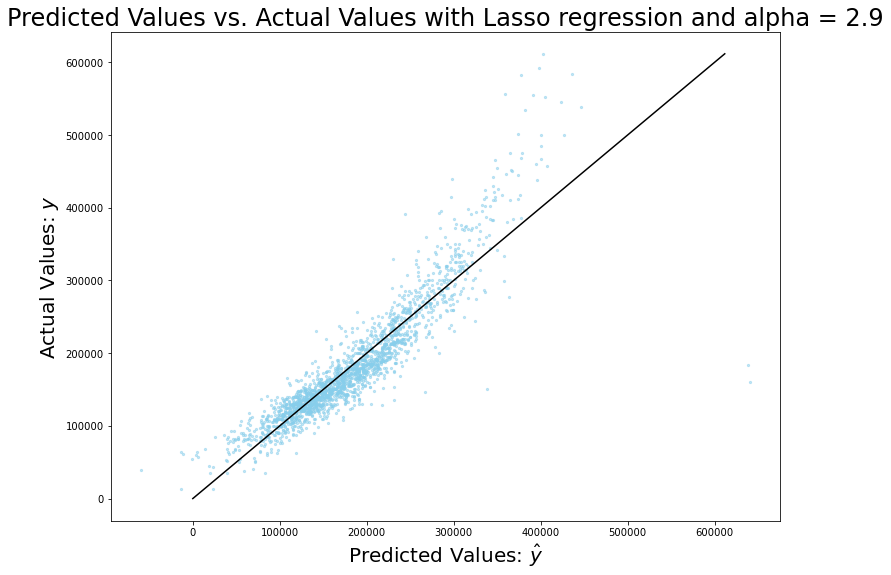

In [34]:
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y_train, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y_train)],
         [0, np.max(y_train)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values with Lasso regression and alpha = {}'.format(lasso_cv.alpha_), fontsize = 24);

In [35]:
lasso_model_opt.coef_

array([ 3.65838884e+03,  7.50917393e+03, -5.94664060e+03,  6.35370943e+03,
        1.32647102e+02,  2.52235981e+04, -1.83152161e+03,  1.22985843e+04,
        5.32637328e+03,  4.42402791e+03,  3.86116203e+03, -2.94127982e+03,
        1.18784938e+03,  1.33526356e+04, -1.09532479e+04,  1.35115571e+03,
        5.00711524e+03,  8.84267805e+03, -1.63611670e+03, -1.02147328e+01,
        2.75591393e+03, -3.94143130e+03, -3.74529527e+02,  3.45373862e+03,
       -2.16177112e+04,  0.00000000e+00,  9.09587155e+03, -5.59044155e+03,
       -1.84541050e+03,  1.25901482e+03, -0.00000000e+00,  3.89300521e+03,
       -2.29018886e+03,  1.15290078e+04,  6.51405099e+03,  7.48340161e+03,
       -2.89876399e+02,  2.10833525e-01,  1.10133285e+03, -3.07140782e+02])

### Ridge Regression
First, find the best alpha. Subsequently, we use the best alpha and do a cross validation on our model. Subsequently apply Ridge.fit to our dataset.

In [36]:
r_alphas = np.logspace(-2,3,500) # Try and error on log scale from 10^-2 to 10^3 for 500 points
ridge_cv = RidgeCV(alphas = r_alphas, store_cv_values = True) #Ridge regression with built-in cross-validation.
ridge_cv.fit(X_train_scaled_merged, y_train)

# Let's average the CV scores for each value of alpha
ridge_cv_means = [np.mean(cv_alpha) for cv_alpha in ridge_cv.cv_values_.T]

In [37]:
ridge_optimal_alpha = ridge_cv.alpha_
ridge_optimal_alpha

80.87524908770449

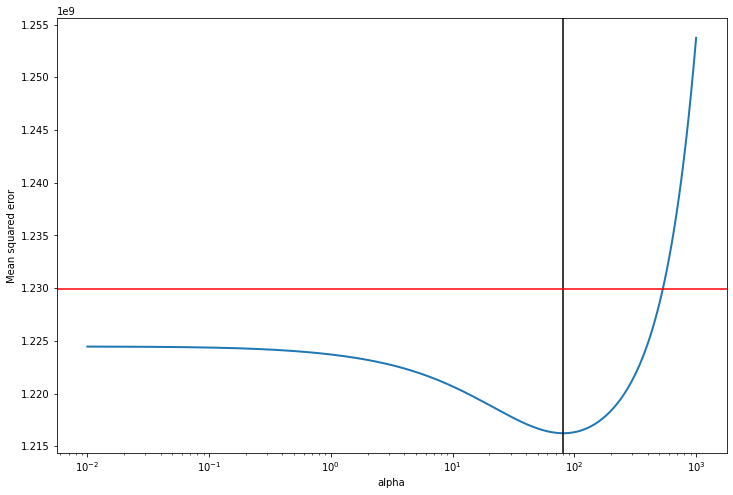

In [38]:
plot_cv(ridge_cv.alphas, ridge_cv_means, ridge_optimal_alpha, lr_cv_mean_mse, log=True)

Apply Ridge regression with best alpha value

In [39]:
ridge_model_opt = Ridge(alpha = ridge_optimal_alpha)
ridge_cv_score = -1 * cross_val_score(ridge_model_opt,
                                X_train_scaled_merged,
                                y_train,
                                cv = 5,
                                scoring = "neg_mean_squared_error"
                           ).mean()

In [40]:
ridge_model_opt.fit(X_train_scaled_merged,y_train)

Ridge(alpha=80.87524908770449)

In [41]:
y_preds = ridge_model_opt.predict(X_train_scaled_merged)

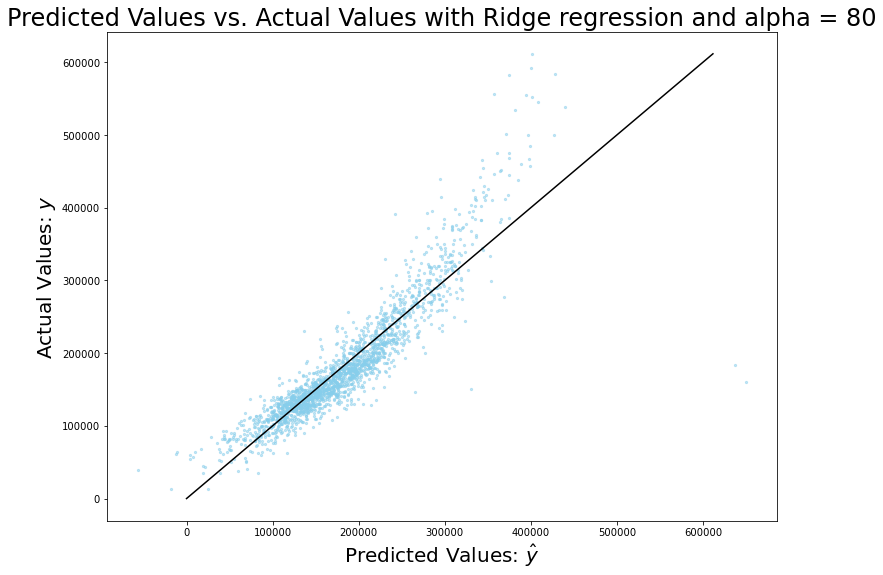

In [42]:
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y_train, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y_train)],
         [0, np.max(y_train)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values with Ridge regression and alpha = {}'.format(int(ridge_cv.alpha_)),
          fontsize = 24);

## Evaluation metrics
Evaluate the RMSE value for the linear,lasso and ridge regression models.

In [43]:
print("Average cross validated RMSE for linear regression {}".format(lr_cv_mean_mse**0.5))
print("Average cross validated RMSE for lasso model {}".format(lasso_cv_score**0.5))
print("Average cross validated RMSE for ridge model {}".format(ridge_cv_score**0.5))

Average cross validated RMSE for linear regression 35070.631066413385
Average cross validated RMSE for lasso model 35059.56843746678
Average cross validated RMSE for ridge model 34615.58696273905


## Predict sale price on test data using the model with best training MSE value and submit results to Kaggle to compare the performance

In [44]:
# Save the prediction into correct csv format which Kaggle accepts
test_data.reset_index(inplace = True)
test_data["SalePrice"] = lr.predict(X_test)    
kaggle_df = test_data[["Id","SalePrice"]].copy()
kaggle_df.to_csv("./datasets/kaggle_lr.csv", index = False)

test_data["SalePrice"] = lasso_model_opt.predict(X_test_scaled_merged)    
kaggle_df = test_data[["Id","SalePrice"]].copy()
kaggle_df.to_csv("./datasets/kaggle_lasso.csv", index = False)

test_data["SalePrice"] = ridge_model_opt.predict(X_test_scaled_merged)    
kaggle_df = test_data[["Id","SalePrice"]].copy()
kaggle_df.to_csv("./datasets/kaggle_ridge.csv", index = False)
print("Average cross validated RMSE for linear regression {}".format(lr_cv_mean_mse**0.5))
print("Average cross validated RMSE for lasso model {}".format(lasso_cv_score**0.5))
print("Average cross validated RMSE for ridge model {}".format(ridge_cv_score**0.5))

Average cross validated RMSE for linear regression 35070.631066413385
Average cross validated RMSE for lasso model 35059.56843746678
Average cross validated RMSE for ridge model 34615.58696273905


## Predict sale price on test data using the model with best training MSE value and submit results to Kaggle to compare the perf

In [45]:
print("Predictors to be scaled: {}.".format(len(predictors_to_scale)))
print("Predictors not to be scaled: {}.".format(len(predictors_not_scale)))
print(required_predictors)

Predictors to be scaled: 24.
Predictors not to be scaled: 16.
['Lot Area', 'House Style', 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Gr Liv Area', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Finish', 'Garage Cond', 'Wood Deck SF', 'Overall_score', 'housing age', 'remod age', 'Exter Score', 'Bsmt score', 'Bsmt Finished Area', 'BsmtFin Score', 'total_bath_rooms', 'Garage years', 'Garage_Area_Per_Car', 'Total_Porch_Area', 'Lot Config_Corner', 'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Garage Type_2Types', 'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']


## Coefficients on predictors arraged in absolute order

In [48]:
lasso_coefficient_list = dict(list(zip(required_predictors,lasso_model_opt.coef_)))
lasso_coefficient_list
dict(sorted(lasso_coefficient_list.items(), key=lambda item: abs(item[1])))

{'Lot Config_Corner': 0.0,
 'Garage Type_2Types': -0.0,
 'Season_Spring': 0.21083352516012718,
 'Bsmt Finished Area': -10.21473283468306,
 'Total Bsmt SF': 132.64710221200892,
 'Season_Fall': -289.8763993856803,
 'Season_Winter': -307.1407823809089,
 'Garage years': -374.5295273900447,
 'Season_Summer': 1101.3328520891102,
 'Garage Cond': 1187.8493805100115,
 'Lot Config_Inside': 1259.0148150379825,
 'housing age': 1351.155713242712,
 'Bsmt score': -1636.1167035618303,
 'Gr Liv Area': -1831.5216081166143,
 'Lot Config_FR3': -1845.4105009347027,
 'Garage Type_Basment': -2290.1888579888055,
 'BsmtFin Score': 2755.913926434864,
 'Garage Finish': -2941.279822052725,
 'Garage_Area_Per_Car': 3453.7386248095095,
 'Lot Area': 3658.3888441305994,
 'Fireplaces': 3861.162027033267,
 'Garage Type_Attchd': 3893.0052099496083,
 'total_bath_rooms': -3941.4313036441104,
 'TotRms AbvGrd': 4424.027908670473,
 'remod age': 5007.115235501949,
 'Kitchen Qual': 5326.373278768312,
 'Lot Config_FR2': -5590.44